# Recommender system bases on Movies rating

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\chanc\python projects\Machine_learning\Recommendation_system\ml-latest-small\ratings.csv")

In [3]:
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
movie_title=pd.read_csv(r"C:\Users\chanc\python projects\Machine_learning\Recommendation_system\ml-latest-small\movies.csv")

In [5]:
movie_title=movie_title.drop("genres",axis=1)

In [6]:
movie_title

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017)
9738,193583,No Game No Life: Zero (2017)
9739,193585,Flint (2017)
9740,193587,Bungo Stray Dogs: Dead Apple (2018)


In [7]:
#merge the datasets
df=pd.merge(df,movie_title,on="movieId")

In [8]:
df

,userId,movieId,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,5,1,4.0,847434962,Toy Story (1995)
2,7,1,4.5,1106635946,Toy Story (1995)
3,15,1,2.5,1510577970,Toy Story (1995)
4,17,1,4.5,1305696483,Toy Story (1995)
...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997)
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971)
100833,610,160836,3.0,1493844794,Hazard (2005)
100834,610,163937,3.5,1493848789,Blair Witch (2016)


# Exploratory data analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

c:\users\chanc\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
# Sort title depending on the average rating of the moveis
df.groupby("title")["rating"].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [11]:
#sort movies depending on the greater rating provided to the movies

In [12]:
df.groupby("title")["rating"].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [13]:
ratings=pd.DataFrame(df.groupby("title")["rating"].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [14]:
ratings["number_of_ratings"]=pd.DataFrame(df.groupby("title")["rating"].count())
ratings

,rating,number_of_ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


<AxesSubplot:>

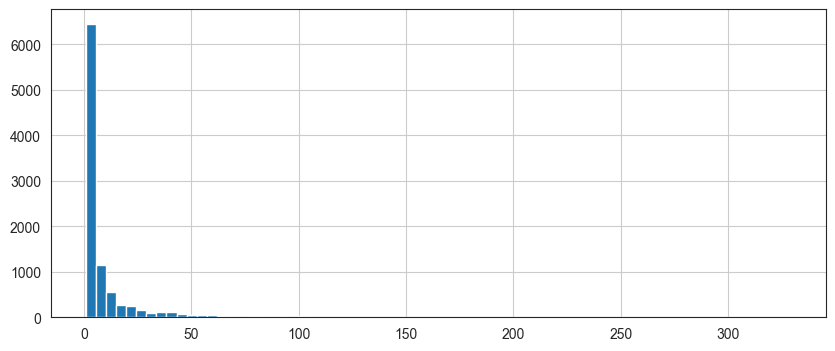

In [15]:
plt.figure(figsize=(10,4))
ratings["number_of_ratings"].hist(bins=70)

<AxesSubplot:>

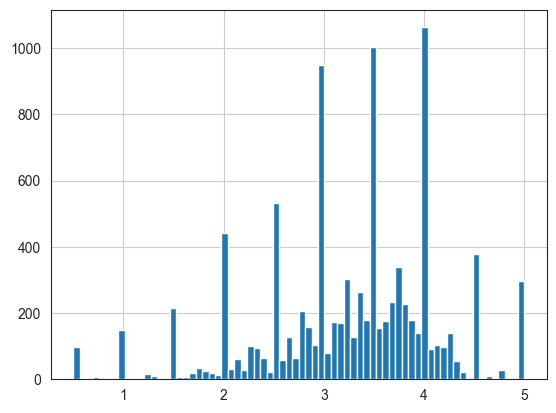

In [16]:
ratings["rating"].hist(bins=70)

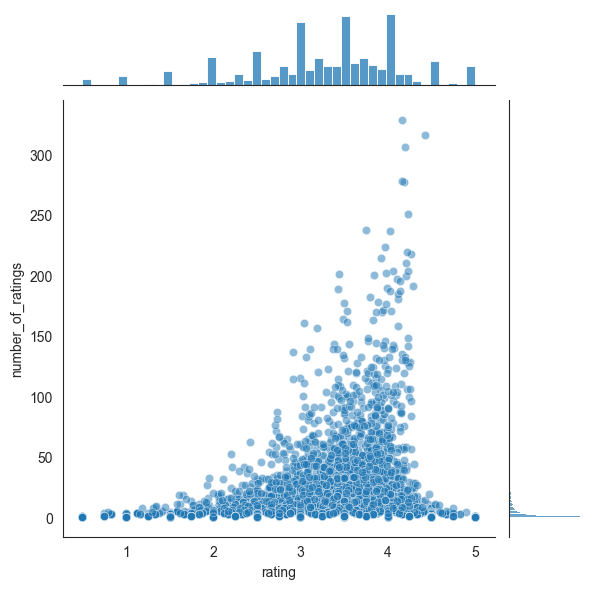

In [17]:
sns.jointplot(x="rating",y="number_of_ratings",data=ratings,alpha=0.5)

In [18]:
# creating table to show which users have provided rating to which all movies, to recommend similar movies to the user

In [19]:
df

,userId,movieId,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,5,1,4.0,847434962,Toy Story (1995)
2,7,1,4.5,1106635946,Toy Story (1995)
3,15,1,2.5,1510577970,Toy Story (1995)
4,17,1,4.5,1305696483,Toy Story (1995)
...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997)
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971)
100833,610,160836,3.0,1493844794,Hazard (2005)
100834,610,163937,3.5,1493848789,Blair Witch (2016)


In [20]:
movie_mat=df.pivot_table(index="userId",columns="title",values="rating")

In [21]:
movie_mat

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [22]:
ratings

,rating,number_of_ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


In [23]:
ratings.sort_values("number_of_ratings",ascending=False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [24]:
jurassic_park_rating=movie_mat["Jurassic Park (1993)"]

In [25]:
jurassic_park_rating

userId
1      4.0
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    2.5
607    4.0
608    3.0
609    3.0
610    5.0
Name: Jurassic Park (1993), Length: 610, dtype: float64

In [26]:
#similar to jurassic park rating
similar_to_jurassic_park=movie_mat.corrwith(jurassic_park_rating)

c:\users\chanc\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\users\chanc\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [27]:
corr_jurassic=pd.DataFrame(similar_to_jurassic_park,columns=["correlation"])
corr_jurassic.dropna(inplace=True)

In [28]:
corr_jurassic.head()

,correlation
title,
"'burbs, The (1989)",0.104077
(500) Days of Summer (2009),-0.125237
*batteries not included (1987),0.290929
...And Justice for All (1979),-0.981981
10 Cent Pistol (2015),-1.000000


In [29]:
corr_jurassic.sort_values("correlation",ascending=False).head(10)

,correlation
title,
In the Valley of Elah (2007),1.0
The Overnight (2015),1.0
Monkey Business (1952),1.0
"Cup, The (Phörpa) (1999)",1.0
Fear (1996),1.0
Feast (2005),1.0
Police Story 2 (Ging chaat goo si juk jaap) (1988),1.0
Insidious (2010),1.0
"Whistleblower, The (2010)",1.0


In [30]:
# filter movies based on the count thayt have less than 100 reviews
corr_jurassic= corr_jurassic.join(ratings["number_of_ratings"])
corr_jurassic.head()

,correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.104077,17
(500) Days of Summer (2009),-0.125237,42
*batteries not included (1987),0.290929,7
...And Justice for All (1979),-0.981981,3
10 Cent Pistol (2015),-1.000000,2


In [31]:
# sort values depending if rating is greater than 100
corr_jurassic[corr_jurassic["number_of_ratings"]>100].sort_values("correlation",ascending=False).head()

,correlation,number_of_ratings
title,,
Jurassic Park (1993),1.000000,238
Outbreak (1995),0.533780,101
Ghostbusters (a.k.a. Ghost Busters) (1984),0.522286,120
"Fugitive, The (1993)",0.460603,190
Indiana Jones and the Temple of Doom (1984),0.456533,108
